In [4]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# load dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# get dataaset infos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking if there are null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# checking if the values are balanced
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
# converting the variables to numbers
sex = {'male': 0,
     'female': 1}

smoker = {'no': 0,
     'yes': 1}

region = {'southeast': 0,
     'southwest': 1,
     'northwest': 2,
     'northeast': 3}

In [10]:
# applying the map to converte the values in numbers
data['sex'] = data['sex'].map(sex)
data['smoker'] = data['smoker'].map(smoker)
data['region'] = data['region'].map(region)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [11]:
# creating a correlation variable
corr = data.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.012816,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

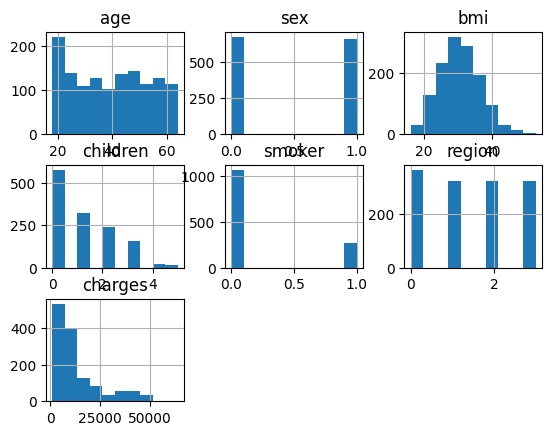

In [12]:
# plottina a histogram with the numerical data
data.hist()

In [13]:
# splitting the dataset in features and target
X = data.drop(['charges'], axis=1)
y = data['charges']

In [14]:
# splitting the dataset in train and test samples
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [16]:
# importing the model
from sklearn.linear_model import LinearRegression

In [17]:
# train and predict the train sample
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_train)


In [18]:
# importing the metrics
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error


In [19]:
# calculating the metrics for train sample
r2 = r2_score(y_train, pred)
mae = mean_absolute_error(y_train, pred)
rmse = root_mean_squared_error(y_train, pred)
print('R2 score is ', r2, '\n')
print('Mean absolute error ', mae, '\n')
print('Root mean squared error ', rmse, '\n')

R2 score is  0.7518195459072954 

Mean absolute error  4141.0262844579065 

Root mean squared error  6010.763807552577 



<Axes: xlabel='charges'>

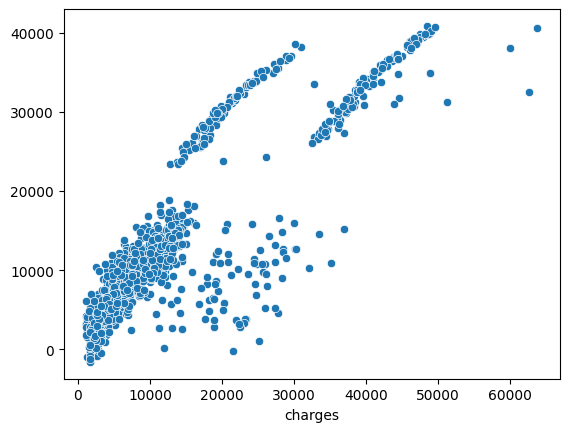

In [31]:
# plotting the results for train sample
sns.scatterplot(x=y_train, y=pred)

In [29]:
# train the test sample
pred_test = model.predict(X_test)
# calculating the metrics
r2 = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)
rmse = root_mean_squared_error(y_test, pred_test)
print('R2 score is ', r2, '\n')
print('Mean absolute error ', mae, '\n')
print('Root mean squared error ', rmse, '\n')

R2 score is  0.7454471618659975 

Mean absolute error  4260.502062366077 

Root mean squared error  6182.955534694495 



<Axes: xlabel='charges'>

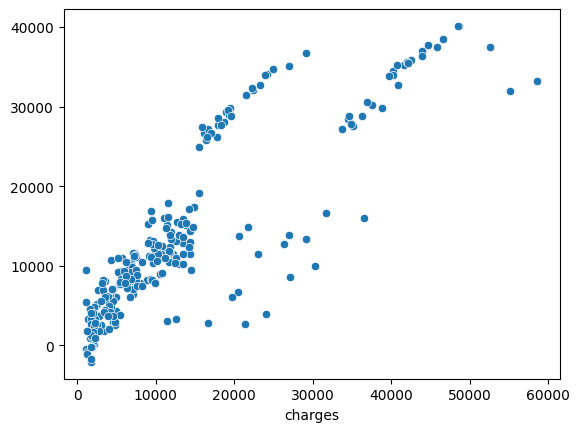

In [22]:
# plotting the results for test sample

sns.scatterplot(x=y_test, y=pred_test)

### Predictive System


In [41]:
input_data = (37,1,27.74,3,0,2) # getting a random line from dataset

input_data = np.asanyarray(input_data) # transform the data into an array

input_data = input_data.reshape(1,-1) # reshape the data

prediction = model.predict(input_data) # predict the data

print(f"The predicted value is {prediction}") # print the results

The predicted value is [8136.01662438]


c:\Users\adams\Desktop\machine_learning\portfolio_machine_learning\medical_insurance_price_liner_regression\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
